# Web Scraping Naukri jobs portal for Data Analyst jobs in Pune,Mumbai,Bangalore.
## Finally building a wordcloud of the keywords in the job description

In [68]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import os
import time
import re
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud

from selenium import webdriver

In [69]:
df = pd.DataFrame(columns=['Title','Company','Ratings','Reviews','Experience','Salary','Posted','Location','URL','Keywords'])

# Loop this for 10 pages
for index in range(1,11):
    chromrdriver = os. getcwd()+"/chromedriver"
    os.environ["webdriver.chrome.driver"] = chromrdriver
    driver = webdriver.Chrome(chromrdriver)
    driver.get("https://www.naukri.com/data-analyst-jobs-in-bangalore-bengaluru-and-pune-and-mumbai-"+str(index))
        
    time.sleep(10)

    soup = BeautifulSoup(driver.page_source,'html.parser')
    
    driver.close()

    results = soup.find(class_='list')

    job_elements = results.find_all(class_="jobTuple")

    for jobs in job_elements:
        title = jobs.find('a',class_="title")
        url = jobs.find('a',class_="title").get('href')
        company = jobs.find('a',class_="subTitle")

        rating = jobs.find('span',class_="starRating")
        if rating is None:
            continue
        else:
            rating = rating.text

        reviews = jobs.find('a',class_="reviewsCount")
        if reviews is None:
            continue
        else:
            temp = re.findall(r'\d+', reviews.text)
            reviews_count = ' '.join(temp)
    
        exp = jobs.find('li',class_='fleft grey-text br2 placeHolderLi experience')
        exp_span = exp.find('span',class_='ellipsis fleft fs12 lh16')
        if exp_span is None:
            continue
        else:
            temp = re.findall(r'\d-\d+', exp_span.text)
            exp_span = ' '.join(temp)
            
        salary = jobs.find('li',class_='fleft grey-text br2 placeHolderLi salary')
        salary_span = salary.find('span',class_="ellipsis fleft fs12 lh16")
        if salary_span is None:
            continue
        else:
            salary_span = salary_span.text

        location = jobs.find('li',class_='fleft grey-text br2 placeHolderLi location')
        location_span = location.find('span',class_="ellipsis fleft fs12 lh16")
        if location_span is None:
            continue
        else:
            location_span = location_span.text
        
        job_history = jobs.find('div',class_=['type br2 fleft grey','type br2 fleft green'])
        job_history_text = job_history.find('span',class_="fleft fw500")
        if job_history_text is None:
            continue
        else:
            temp = re.findall(r'\d+', job_history_text.text)
            job_history_text = ' '.join(temp)
        
        keys = jobs.find('ul',class_='tags has-description')
        lists = keys.find_all('li',class_='fleft fs12 grey-text lh16 dot')
        keywords = ''
        for list in lists:
            keywords = keywords  + list.text + ','

        df=df.append({'URL':url,'Title':title.text,'Company':company.text,'Ratings':rating,'Reviews':reviews_count,'Experience':exp_span,'Salary':salary_span,'Posted':job_history_text,'Location':location_span,'Keywords':keywords},ignore_index = True)


In [70]:
df.shape

(119, 10)

In [71]:
df.head()

,Title,Company,Ratings,Reviews,Experience,Salary,Posted,Location,URL,Keywords
0,Hiring Business data analyst with Strong SQL S...,Hexaware Technologies Ltd.,3.5,1667,9-13,"9,00,000 - 18,00,000 PA.",1,Bangalore/Bengaluru,https://www.naukri.com/job-listings-hiring-bus...,"IT Skills,Tableau,Data Quality,Data Management..."
1,Business Data Analyst,United Phosphorus Limited,4.3,850,5-7,Not disclosed,2,Mumbai,https://www.naukri.com/job-listings-business-d...,"Data Extraction,Data Visualization,QlikView,Ta..."
2,Business Data Analyst,NetApp,4.2,118,3-6,Not disclosed,1,Bangalore/Bengaluru,https://www.naukri.com/job-listings-business-d...,"Data Analysis,Data Mining,Data Analyst,Busines..."
3,"Business Data Analyst - Treasury Markets,",Luxoft,4.4,73,3-6,Not disclosed,2,Bangalore/Bengaluru,https://www.naukri.com/job-listings-business-d...,"IT Skills,Testing,Product Management,Oracle,Ta..."
4,Network Design & Data Analyst,Dell International Services India Private Lim...,4.0,1776,0-2,Not disclosed,13,Bangalore/Bengaluru,https://www.naukri.com/job-listings-network-de...,"JMP,Six Sigma,SAS,Lean,SQL,Project Management,..."


In [72]:
df.to_csv('Naukri Data Analyst jobs .csv',index=False)
print('File Saved')

File Saved


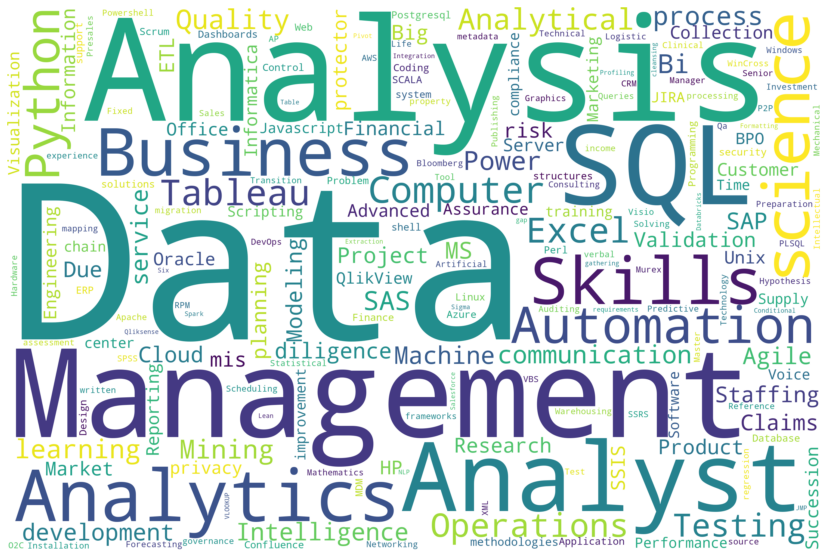

In [73]:
text = " ".join(cat for cat in df.Keywords)
# Specifying width and height for better resolution and less blurry wordcloud
word_cloud = WordCloud(collocations = False, background_color = 'white',width=3000, height=2000).generate(text)
plt.figure(figsize=[15,10]);
plt.imshow(word_cloud, interpolation='bilinear');
plt.axis("off");
plt.savefig('jobs.png');